# Other clustering algorithms

In [13]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1. Density based spatial clustering of applications with noise
 - can identify clusters of arbitrary shapes unlike KMeans
 - works well if all the clusters are dense enough, and they are well separated by low-density regions

In [1]:
from sklearn.cluster import DBSCAN

In [2]:
from sklearn.datasets import make_moons

In [3]:
X,y = make_moons(n_samples = 1000, noise= 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [10]:
dbscan.labels_[:20] #instances with label -1 are considered anomalies

array([ 0,  0,  1,  2,  1,  2,  0,  0,  0,  2,  0,  2,  2,  0, -1,  2,  0,
        2,  2,  2])

In [5]:
len(dbscan.core_sample_indices_)

826

In [11]:
dbscan.components_[:10] #core indices

array([[ 0.89238007, -0.50291371],
       [ 0.84884606, -0.41640585],
       [ 2.03443109,  0.29060951],
       [-0.08855479,  1.00229188],
       [ 1.95907384,  0.00362686],
       [ 0.98190298,  0.31326535],
       [ 0.18481653, -0.17179758],
       [ 0.08842225,  0.20044973],
       [ 0.85715372, -0.45030317],
       [-0.31295362,  0.90386076]])

In [15]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [16]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

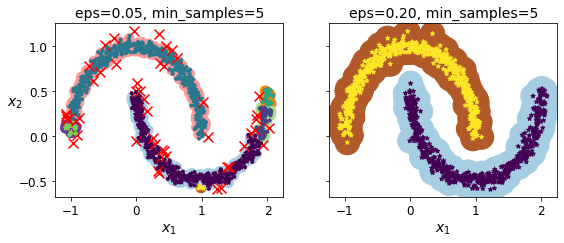

In [17]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()


In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#predicting label of new instance (dbscan doesn't have predict method)
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])


KNeighborsClassifier(n_neighbors=50)

In [20]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([2, 0, 2, 1])

In [21]:
knn.predict_proba(X_new)

array([[0.18, 0.  , 0.42, 0.  , 0.4 , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.3 , 0.  , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.66, 0.  , 0.34, 0.  , 0.  ]])

In [22]:
#identifying anomalies with Knn
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  2, -1])

## 2. Agglomerative clustering

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
X = np.array([0,2,5,8.5]).reshape(-1,1)

In [25]:
agg = AgglomerativeClustering(linkage = "complete").fit(X)

In [26]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
           if attrib.endswith("_") and not attrib.startswith("_")]

In [27]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [29]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

## 3. spectral clustering

In [30]:
from sklearn.cluster import SpectralClustering

In [31]:
sc1 = SpectralClustering(n_clusters = 2, gamma = 100, random_state=42)
sc1.fit(X)

/home/ashishk/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [32]:
sc2 = SpectralClustering(n_clusters=2, gamma = 1, random_state=42)

In [33]:
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [34]:
np.percentile(sc1.affinity_matrix_, 95)

1.0

In [35]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

IndexError: index 1 is out of bounds for axis 1 with size 1

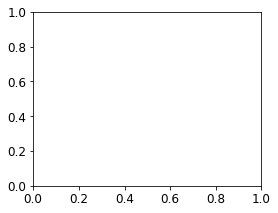

In [37]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()